Euclidean and Manhattan Distance Calculations

In this short mini project, examples and comparisons of distance measures are shown. Specifically, visually compare the Euclidean distance to the Manhattan distance measures. The application of distance measures has a multitude of uses in data science and is the foundation of many algorithms we will be using such as Prinical Components Analysis.

In [145]:
### load required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [146]:
### get csv file into pandas dataframe
data = pd.read_csv('distance_dataset.csv',index_col=0) ### getsrid of "Unnamed: 0"

In [147]:
data.shape

(2000, 4)

In [148]:
data.head(3)

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2


In [149]:
data.tail(3)

,X,Y,Z,ClusterID
1997,2.000186,2.351911,6.779311,1
1998,4.735917,5.642677,4.855780,4
1999,4.955436,5.270550,7.844768,3


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          2000 non-null   float64
 1   Y          2000 non-null   float64
 2   Z          2000 non-null   float64
 3   ClusterID  2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 78.1 KB


In [151]:
data.describe()

,X,Y,Z,ClusterID
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.002561,5.032657,5.017639,3.000000
std,1.935367,1.956047,1.957894,1.414567
min,1.170533,1.350509,1.015867,1.000000
25%,4.544975,3.704038,3.790899,2.000000
50%,4.998504,5.081169,5.015852,3.000000
75%,5.457089,6.348823,6.345780,4.000000
max,8.983353,8.343726,8.600705,5.000000


### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

We are using Pandas to load our dataset .CSV file and use Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that we choose as reference. On the left here we show the dataset projected onto the YZ plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle of radius that distance.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

In [152]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distEuclid = np.sqrt((data.Z - 5)**2 + (data.Y - 5)**2)

**<font color='teal'>Create a distance to reference point (3,3) matrix similar to the above example.</font>**

In [153]:
distreference = np.sqrt((data.Z - 3)**2 + (data.Y -3)**2)

**<font color='teal'>Replace the value set to 'c' in the plotting cell below with your own distance matrix and review the result to deepen your understanding of Euclidean distances. </font>**

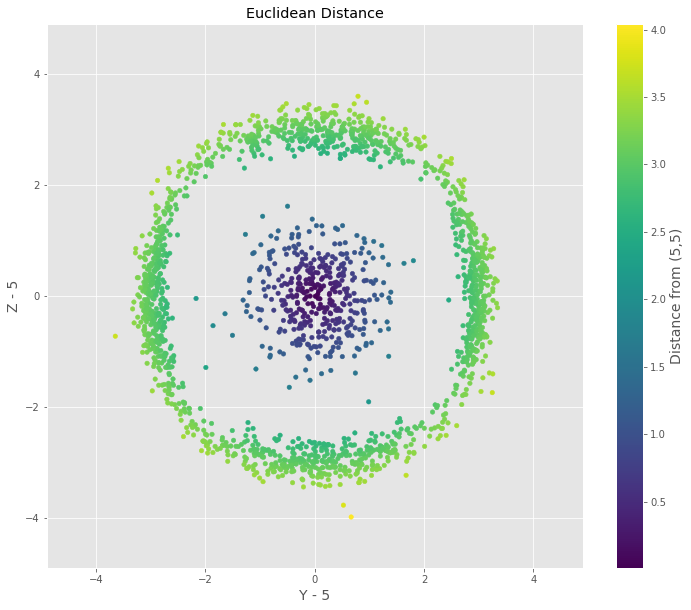

In [154]:
figEuclid1 = plt.figure(figsize=[12,10])

plt.scatter(data.Y - 5, data.Z-5, c=distEuclid, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)

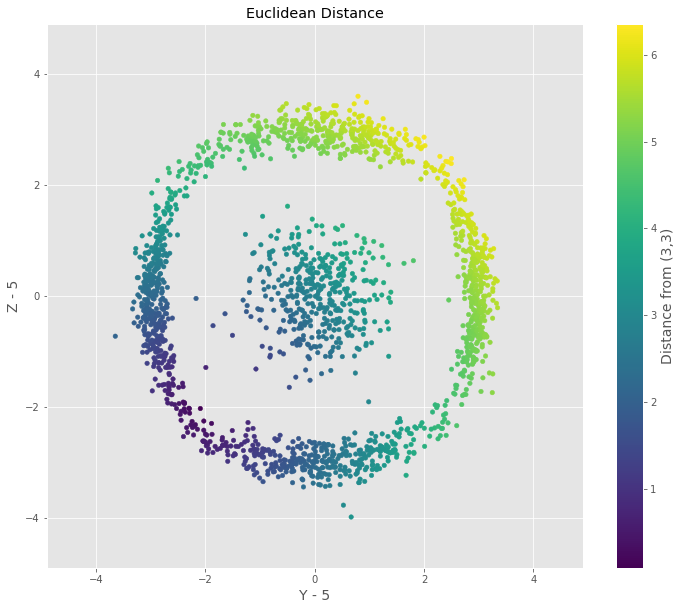

In [155]:
figEuclid2 = plt.figure(figsize=[12,10])

plt.scatter(data.Y - 5, data.Z-5, c=distreference, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (3,3)', size=14)

### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measures distances along the coorinate axis, which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points lying at the same distance define a circle that looks like a Euclidean square.

In [156]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distManhattan = np.abs(data.X - 5) + np.abs(data.Z - 5)

**<font color='teal'>Create a Manhattan distance to reference point (4,4) matrix similar to the above example and replace the value for 'c' in the plotting cell to view the result.</font>**

In [157]:
distManhattan = np.abs(data.X - 4) + np.abs(data.Z - 4)

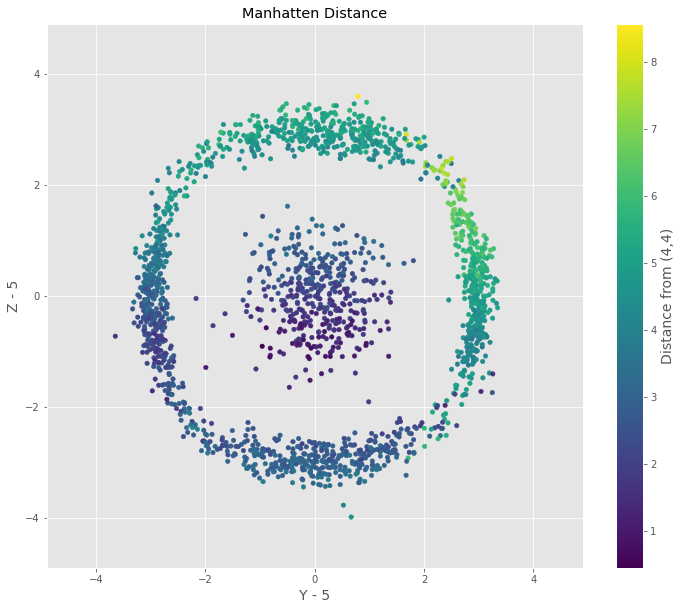

In [158]:
figEuclid3 = plt.figure(figsize=[12,10])
plt.scatter(data.Y - 5, data.Z-5, c=distManhattan, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Manhatten Distance')
cb = plt.colorbar()
cb.set_label('Distance from (4,4)', size=14)

Now let's create distributions of these distance metrics and compare them. We leverage the scipy dist function to create these matrices similar to how you manually created them earlier in the exercise.

In [159]:
import scipy.spatial.distance as dist

mat = data[['X','Y','Z']].values
EuclideanDistance = dist.pdist(mat,'euclidean')
ManhattanDistance = dist.pdist(mat, 'cityblock')
largeMat = np.random.random((10000,100))

**<font color='teal'>Plot histograms of each distance matrix for comparison.</font>**

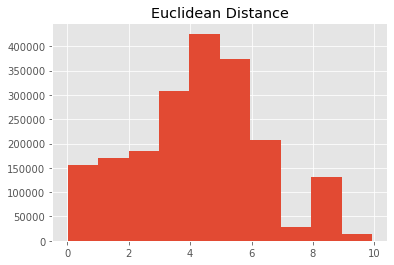

In [160]:
plt.hist(EuclideanDistance) 
plt.title("Euclidean Distance") 
plt.show()

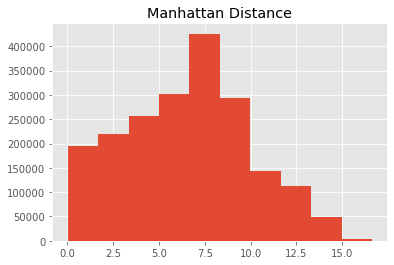

In [161]:
plt.hist(ManhattanDistance) 
plt.title("Manhattan Distance") 
plt.show()